# ILSVRC

- ImageNet Large Scale Visual Recognition Challenge
- 2017년도를 기점으로 종료
- 이미지 인식/분류 대회

## History

- 2010 : 
- 2011 : 
- 2012 : AlexNet(CNN 기반 딥러닝 알고리즘), CNN을 처음 사용, 이후로 딥러닝이 주류로 등장, 대부분 CNN을 기반으로 작성, 인식률 26% -> 16% 개선
- 2013 : 
---
- 2014 : GoogleLeNet(Inception v2) 우승
- 2015 : ResNet - 사람의 인식하는 정확도 5%를 추월했다.
- 2016 : GoogleLeNet-v4 우승
- 2017 : SENet, 인식률 2.3% -> 대회 종료

# CNN

- 합성곱 신경망(Convolutional Neural Network)
- history
    - 1998 : 얀 레쿤 소개
    - 2003 : Behnke의 논문에서 일반화, Simard의 논문에서 단순화
- 분야
    - 이미지 인식, 음성 인식, 자연어 사용 등
    - 해당 분야에서 뛰어난 성과를 내고 있다.

In [0]:
'''
layers
    ┗ 입력층
    ┗ 중간층
        ┗ 합성곱층
        ┗ 풀링층
        ┗ ...(여러번 반복)
        ┗ 합성곱층
        ┗ 풀링층
        ┗ 전결합층
        ┗ 드롭아웃층(위치는 여러 곳에서 여러 번 나올 수 있다.) -> 과적합 방지(학습 누락)
    ┗ 출력층
'''

# CNN 원리

- 이미지의 공간 정보를 유지
- 인접 이미지와의 특징을 효과적으로 인식하고 강조
- 구성
    - 이미지 특징 추출
        - 합성곱층
            - 필터(커널) 행렬을 이동시켜서(스트라이드) 이미지의 특징을 추출(찾는다.)
        - 풀링층
            - 그런 특징을 강화한다.
    - 이미지 분류
        - 출력층
            - 이 이미지는 XXX이다. 예측

# 합성곱층(Convolution Layer)

- Convolution Layer
- 이미지의 특징을 추출한다.
- 방법
    - 입력 x(이미지, 손글씨 이미지 1개(차후 채널 수도 신경씀, 흑백: 1채널, 칼라: 3채널 - RGB))의 이미지의 일부분을 조금씩 자르면서(필터(커널)가 담당, 필터를 통과시켜서, 필터를 이동시키는 크기(스트라이드)), 추출된 특징값에 가중치 필터 W를 적용
        - 목적 : 평활화, 윤곽선 검출 등 목적
        - 용어
            - 평활화(equalization) : 명암의 분포를 균일/균등하게 처리
            - 윤곽선 검출(edge detection) : 이미지 내부의 대상들에 대한 윤곽을 추출

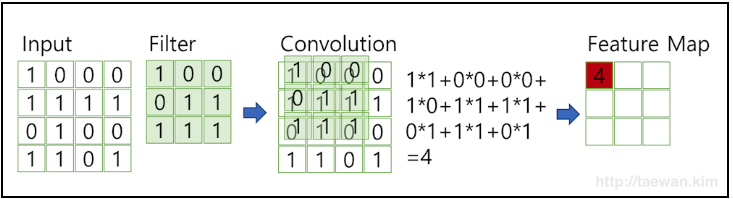

In [2]:
from IPython.display import Image
Image('/content/합성곱계산과정.png', width=500)

# 아래 그림은 원본이미지에 필터를 통과시켜서 특징맵의 요소를 채우는 화면

- 필터, 스트라이드
    - 이미지를 조금씩 자르기 위해 필터를 움직이는데, 움직이는 크기는 한 픽셀에서 n칸 이동할 수 있다. 이것을 stride
    - 용어
        - 필터(filter) : 이미지의 특징을 찾아내기 위한 공용 파라미터(= kernel, 커널)
        - 스트라이드(stride) : 필터가 순회하는 간격, 커널이 움직이는 크기

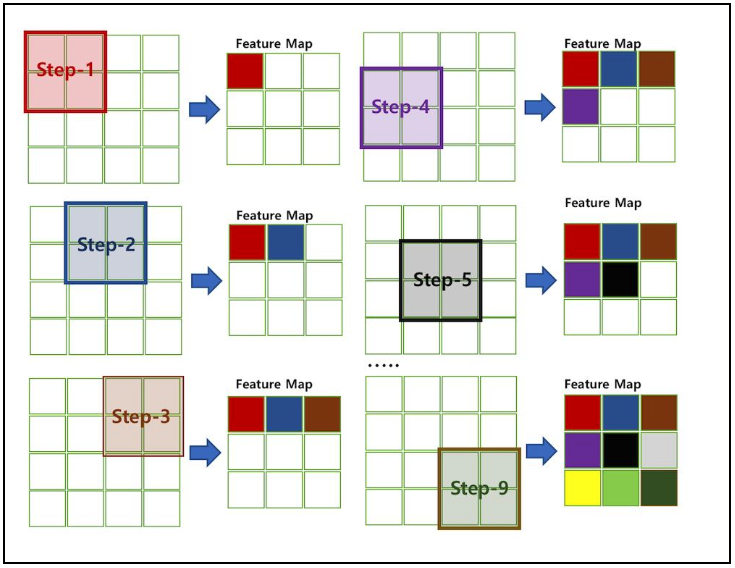

In [3]:
Image('/content/커널의스트라이드이동.png', width=500)

- 평활화, 윤곽선 검출 등 처리를 위한 과정
    - 용어
        - 가중치(W) : 필터의 행렬의 크기가 3x3이라면, 가중치 행렬도 3x3으로 준비, 필터의 파라미터, 필터를 구성하는 성분값들
        - 편향(b) : 1개 준비
    - 장점
        - 입력층이 28x28이면 총 픽셀 수가 784개가 된다. 이런 경우 가중치는 각각 픽셀에 대해서 구해야 하므로 가중치의 개수도 784개를 구해 놓아야 한다. 반면, 필터를 활용하면 만약, 사이즈가 3x3이라면 가중치는 9개만 구하면 된다. -> 계산량이 압도적으로 줄어들어서 학습 속도가 빨라지고 효율적이게 된다.

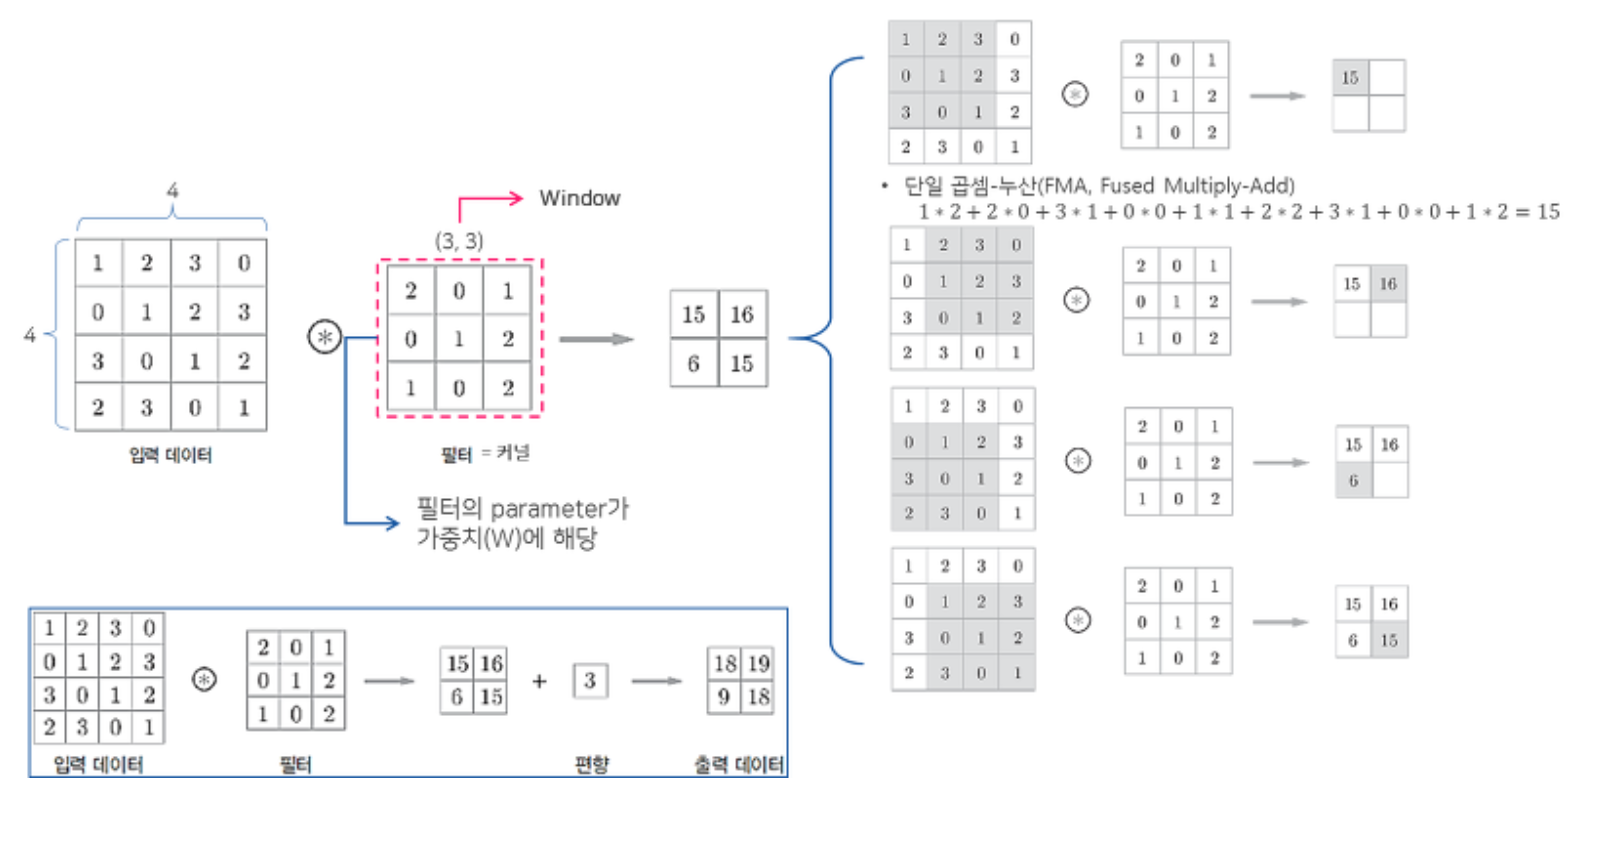

In [7]:
Image('/content/dp1.png', width=800)

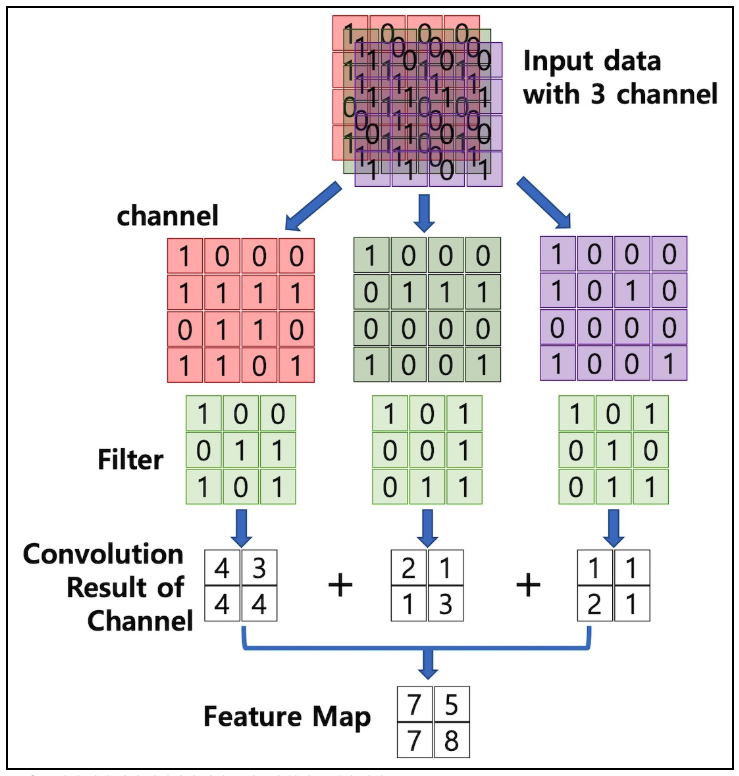

In [11]:
Image('/content/멀티입력.png', width=400)

# 3채널 이미지를 컨볼루젼 계층에 통과시킬 때 특성맵이 뽑히는 과정

- padding(패딩)
    - Feature Map은 입력 데이터보다 shape이 작다.
    - shape이 작아지다가 경계선에 만나서 Feature Map의 크기가 완전해지지 않으면, 외곽을 채워서(지정된 픽셀만큼 특정값으로 채워서) 크기를 보정하는 과정
    - 통상 0으로 채운다.
    - 합성곱을 통과시킬수록 계속 작아지므로 보정 작업이 발생될 수 있다.
    - 이렇게 채워진 테두리는 통상 0으로 채운다면 연산량이 중심 쪽에 비해 현저하게 줄어드는 특징이 있다.
    - 인공 신경망이 이미지의 외곽을 효과적으로 인식하는 학습효과를 얻을 수 있다. 

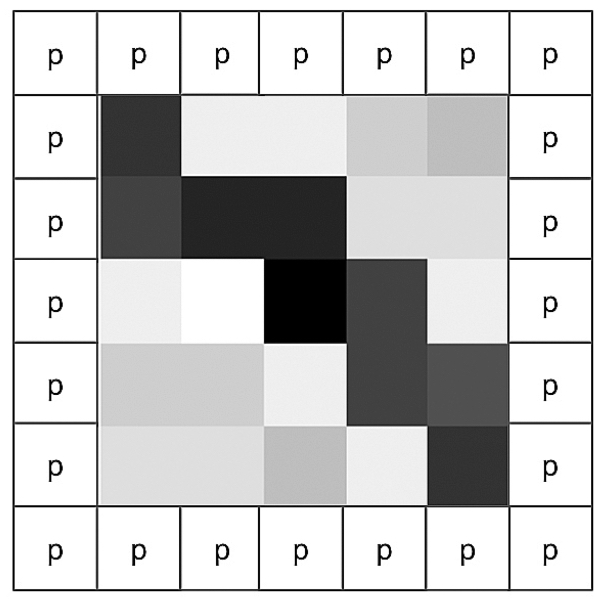

In [13]:
Image('/content/padding.jpeg', width=300)

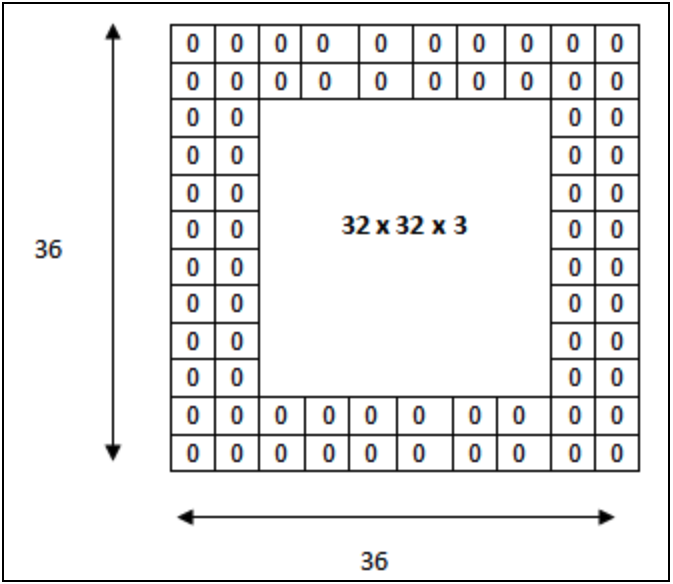

In [16]:
Image('/content/padding2.png', width=300)

- 합성곱 층의 결과물
    - Feature Map or Activation Map
    - 행렬
    - Feature Map : 합성곱 층의 계산을 통해서 만들어진 행렬
    - Activation Map : Feature Map 행렬을 활성화에 적용시킨 결과
    - 통상적으로 Convolution Layer의 최종 결과물은 Activation Map이다.

# 풀링층(Pooling Layer)

- 이미지의 특징을 강화한다.
- 합성곱 층의 출력인 특징맵 C를 축소하는 층
- 특징을 유지한 채로 축소하므로 위치 변경이나 결과 변화를 방지
- 예
    - 직선인식 : 직선이 미세하게 흐트러져 있어도 직선이라고 인식하게 된다.
- 종류
    - 최대 풀링(단위에서 최대값만 취한다.), 최소 풀링, 평균 풀링 등이 존재
- 특징
    - 학습 대상 파라미터가 없다.(가중치X)
    - 풀링을 통과하면 행렬의 크기가 감소된다.
    - 풀링을 통과하면 채널 수 변경 없다.

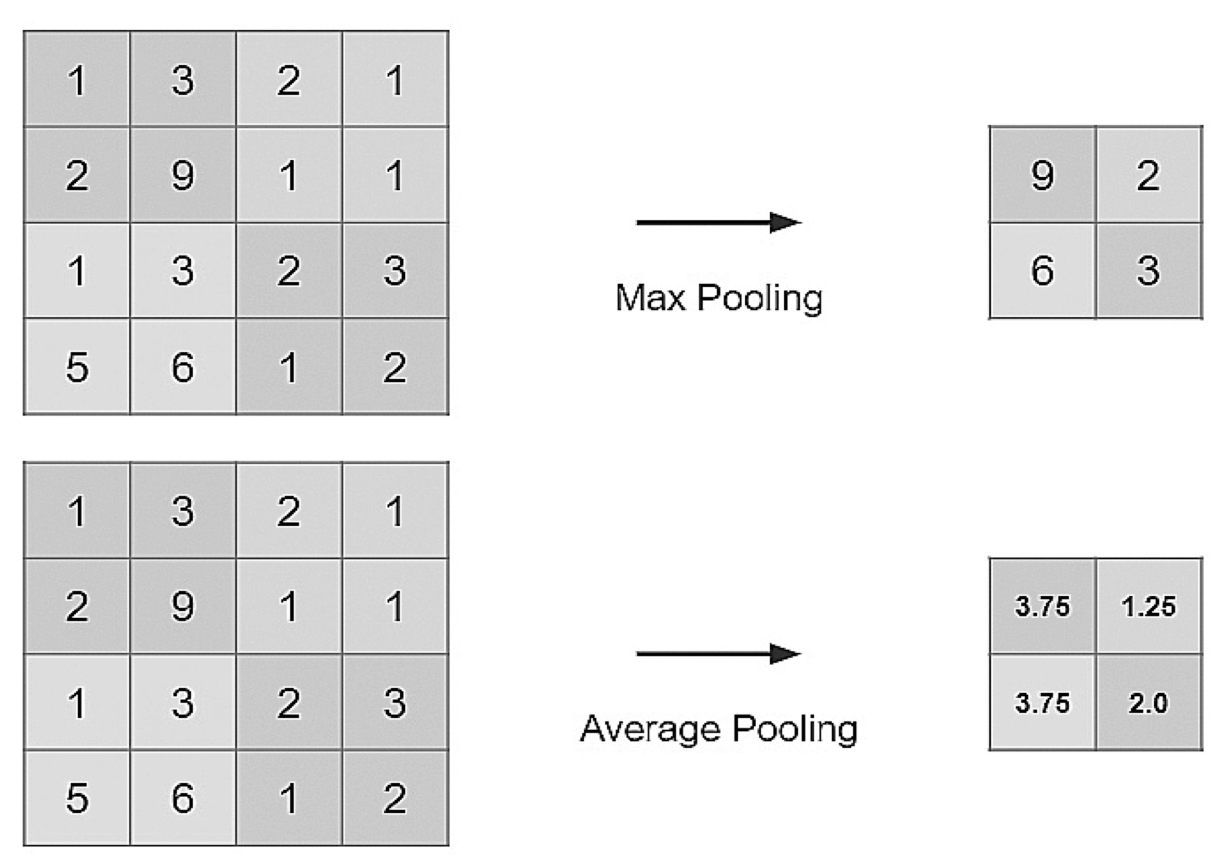

In [23]:
Image('/content/pooling.jpeg', width=400)

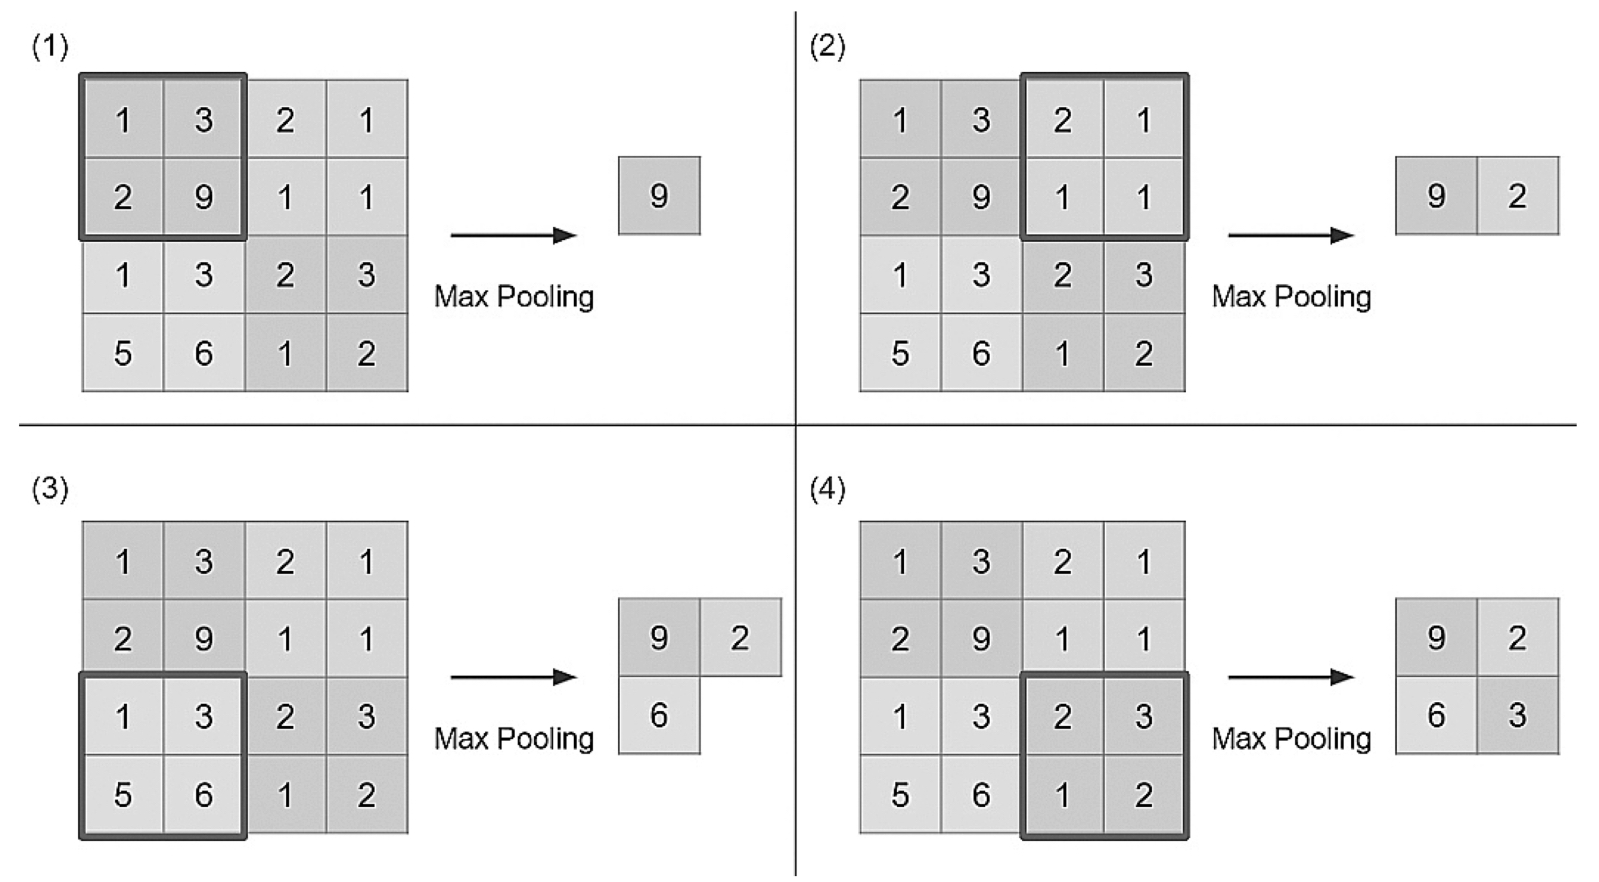

In [21]:
Image('/content/pooling2.jpeg', width=500)

# 전결합층(Fully Connected Layer)

- 전결합층까지 도착한 특징맵(활성화맵)을 1차원으로 전개하는 역할 담당
- Flatten(행렬을 1차원으로 펴주는 업무)
- 활성화 함수를 이용하면 특성을 더욱 강조할 수 있다.

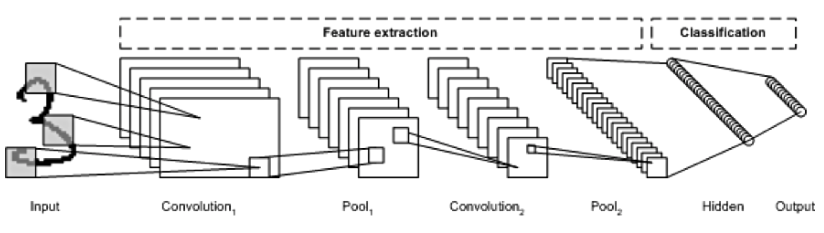

In [25]:
Image('/content/전결합층.png', width=600)

# 드롭아웃층(Dropout Layer)

- 과적합, 오버핏(over-fit)을 방지하기 위한 방법
- 원리
- 인공 신경망이 학습중일 때, 랜덤하게 뉴런(신경망)을 꺼서 학습을 방해한다. -> 학습이 학습용 데이터에 치우치는 현상을 방지
- 어떤 층 사이에도 존재할 수 있다.

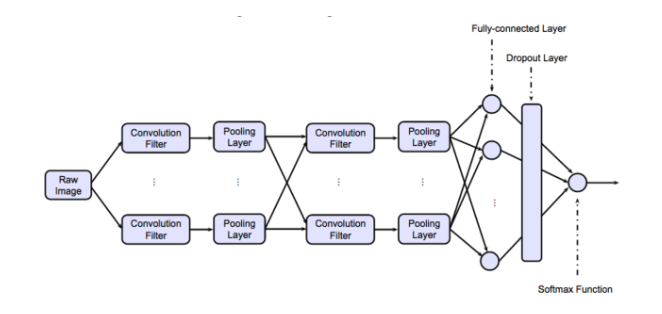

In [28]:
Image('/content/드롭아웃.png', width=600)

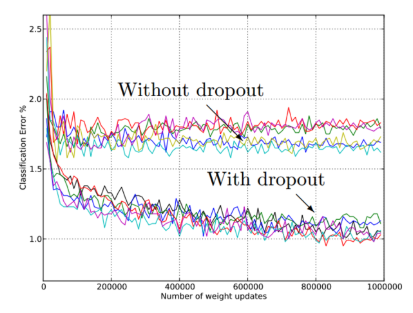

In [30]:
Image('/content/드롭아웃성과.png', width=500)